In [1]:
import pandas as pd
import numpy as np
import json
import sys
sys.path.append('../')
from train_pda_cv import compute_metrics

In [12]:
artifact_folder = '/project/rcde/datasets/pda/model_run_artifacts/pda_cvtest_/'

with open(f"{artifact_folder}/cv_results_val.json", 'r') as f:
    res_val = pd.DataFrame(json.load(f))

with open(f"{artifact_folder}/cv_results_test.json", 'r') as f:
    res_test = pd.DataFrame(json.load(f))

print(res_val.keys())

assert (res_val.keys() == res_test.keys()).all()

Index(['split', 'loss', 'metrics', 'targets', 'outputs', 'external_ids',
       'patient_ids'],
      dtype='object')


In [13]:
res_val

,split,loss,metrics,targets,outputs,external_ids,patient_ids
0,0,0.372326,"{'roc_auc': 0.9326337608498511, 'accuracy': 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[-7.76361608505249, -6.304462432861328, 3.7870...","[study86_dicom65, study86_dicom99, study86_dic...","[ded498e8adf7852f, ded498e8adf7852f, ded498e8a..."
1,1,0.414246,"{'roc_auc': 0.915144448762793, 'accuracy': 0.8...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[-2.31223726272583, -2.7007052898406982, 5.535...","[study86_dicom65, study86_dicom99, study86_dic...","[ded498e8adf7852f, ded498e8adf7852f, ded498e8a..."
2,2,0.388852,"{'roc_auc': 0.8829723674383868, 'accuracy': 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[-0.5057515501976013, -1.3302643299102783, -2....","[study42_dicom81, study42_dicom50, study42_dic...","[d9d3ed4a1ab8b062, d9d3ed4a1ab8b062, d9d3ed4a1..."
3,3,0.369719,"{'roc_auc': 0.8780748663101605, 'accuracy': 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[0.7543725967407227, -0.7873060703277588, 0.17...","[study48_dicom91, study48_dicom68, study48_dic...","[048d893a43658996, 048d893a43658996, 048d893a4..."
4,4,0.464855,"{'roc_auc': 0.8971671603250551, 'accuracy': 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[7.233974933624268, 9.701434135437012, 5.08470...","[study21_dicom30, study21_dicom32, study21_dic...","[17a19a86d4e64b41, 17a19a86d4e64b41, 17a19a86d..."
5,5,0.426827,"{'roc_auc': 0.9030303030303031, 'accuracy': 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[0.22592750191688538, -1.4403835535049438, -0....","[study48_dicom91, study48_dicom68, study48_dic...","[048d893a43658996, 048d893a43658996, 048d893a4..."


In [14]:
df_val, df_test = [pd.concat([d[['split', 'loss']], pd.DataFrame(d.metrics.tolist())], axis=1) for d in (res_val, res_test)]
df_val

,split,loss,roc_auc,accuracy,sensitivity,specificity
0,0,0.372326,0.932634,0.869318,0.838710,0.903614
1,1,0.414246,0.915144,0.818182,0.903226,0.722892
2,2,0.388852,0.882972,0.819742,0.815385,0.825243
3,3,0.369719,0.878075,0.813559,0.823529,0.787879
4,4,0.464855,0.897167,0.852941,0.885167,0.746032
5,5,0.426827,0.903030,0.805085,0.741176,0.969697


# Clip-level results

In [15]:
import statsmodels.stats.api as sms

print("------------------------------------")
print("Clip-level results:")
print("------------------------------------")
print()
print("Validation 95% Confidence Intervals:")
print("------------------------------------")
cols = ['loss', 'roc_auc', 'accuracy', 'sensitivity', 'specificity']
for c in cols:
    mean = df_val[c].mean()
    low, high = sms.DescrStatsW(df_val[c]).tconfint_mean()
    print(f"{c:>11}: {mean:0.3f} [{low:0.3f}, {high:0.3f}]")

print()
print("Test 95% Confidence Intervals:")
print("------------------------------------")
cols = ['loss', 'roc_auc', 'accuracy', 'sensitivity', 'specificity']
for c in cols:
    mean = df_test[c].mean()
    low, high = sms.DescrStatsW(df_test[c]).tconfint_mean()
    print(f"{c:>11}: {mean:0.3f} [{low:0.3f}, {high:0.3f}]")

------------------------------------
Clip-level results:
------------------------------------

Validation 95% Confidence Intervals:
------------------------------------
       loss: 0.406 [0.368, 0.445]
    roc_auc: 0.902 [0.880, 0.923]
   accuracy: 0.830 [0.803, 0.856]
sensitivity: 0.835 [0.774, 0.895]
specificity: 0.826 [0.726, 0.926]

Test 95% Confidence Intervals:
------------------------------------
       loss: 0.481 [0.378, 0.584]
    roc_auc: 0.865 [0.825, 0.904]
   accuracy: 0.771 [0.692, 0.849]
sensitivity: 0.802 [0.710, 0.894]
specificity: 0.769 [0.616, 0.922]


# Study-level results

In [16]:
pat_val = res_val.drop(['loss', 'metrics'], axis=1).explode(column=['targets', 'outputs', 'external_ids', 'patient_ids'])
pat_val['study'] = pat_val.external_ids.str.split('_').str[0]
pat_val

,split,targets,outputs,external_ids,patient_ids,study
0,0,1.0,-7.763616,study86_dicom65,ded498e8adf7852f,study86
0,0,1.0,-6.304462,study86_dicom99,ded498e8adf7852f,study86
0,0,1.0,3.787008,study86_dicom105,ded498e8adf7852f,study86
0,0,1.0,5.327815,study86_dicom108,ded498e8adf7852f,study86
0,0,1.0,2.038718,study86_dicom109,ded498e8adf7852f,study86
...,...,...,...,...,...,...
5,5,1.0,0.875129,study43_dicom7,f8dd48f1f7946612,study43
5,5,1.0,1.976349,study43_dicom9,f8dd48f1f7946612,study43
5,5,1.0,3.327712,study43_dicom13,f8dd48f1f7946612,study43
5,5,1.0,0.723056,study43_dicom18,f8dd48f1f7946612,study43


In [17]:
pat_test = res_test.drop(['loss', 'metrics'], axis=1).explode(column=['targets', 'outputs', 'external_ids', 'patient_ids'])
pat_test['study'] = pat_test.external_ids.str.split('_').str[0]
pat_test

,split,targets,outputs,external_ids,patient_ids,study
0,0,0.0,-2.006141,study42_dicom81,d9d3ed4a1ab8b062,study42
0,0,0.0,-2.989669,study42_dicom50,d9d3ed4a1ab8b062,study42
0,0,0.0,-3.431382,study42_dicom67,d9d3ed4a1ab8b062,study42
0,0,0.0,-2.483953,study42_dicom79,d9d3ed4a1ab8b062,study42
0,0,0.0,-1.088541,study42_dicom85,d9d3ed4a1ab8b062,study42
...,...,...,...,...,...,...
5,5,0.0,0.206901,study55_dicom104,efa3614c94506474,study55
5,5,0.0,-0.323145,study55_dicom95,efa3614c94506474,study55
5,5,0.0,-0.939825,study55_dicom61,efa3614c94506474,study55
5,5,0.0,0.552775,study55_dicom103,efa3614c94506474,study55


In [18]:
# make patient-type level prediction
pat_lvl_preds_val = pat_val.groupby(['split', 'study', 'targets'], as_index=False).apply(lambda x: pd.Series(
    {
        'outputs': x.outputs.astype(np.float32).mean(),
    }))
    
pat_level_mets_val = pat_lvl_preds_val.groupby('split', as_index=False).apply(
        lambda x: pd.Series(compute_metrics(x.targets.astype(int), x.outputs, from_probs=True, threshold=0.5))
    )

# again for test:
pat_lvl_preds_test = pat_test.groupby(['split', 'study', 'targets'], as_index=False).apply(lambda x: pd.Series(
    {
        'outputs': x.outputs.astype(np.float32).mean(),
    }))
    
pat_level_mets_test = pat_lvl_preds_test.groupby('split', as_index=False).apply(
        lambda x: pd.Series(compute_metrics(x.targets.astype(int), x.outputs, from_probs=True, threshold=0.5))
    )

In [19]:
import statsmodels.stats.api as sms

print("------------------------------------")
print("Study-level results:")
print("------------------------------------")
print()
print("Validation 95% Confidence Intervals:")
print("------------------------------------")
cols = ['roc_auc', 'accuracy', 'sensitivity', 'specificity']
for c in cols:
    mean = pat_level_mets_val[c].mean()
    low, high = sms.DescrStatsW(pat_level_mets_val[c]).tconfint_mean()
    print(f"{c:>11}: {mean:0.3f} [{low:0.3f}, {min(high,1):0.3f}]")

print()
print("Test 95% Confidence Intervals:")
print("------------------------------------")
cols = ['roc_auc', 'accuracy', 'sensitivity', 'specificity']
for c in cols:
    mean = pat_level_mets_test[c].mean()
    low, high = sms.DescrStatsW(pat_level_mets_test[c]).tconfint_mean()
    print(f"{c:>11}: {mean:0.3f} [{low:0.3f}, {min(high,1):0.3f}]")

------------------------------------
Study-level results:
------------------------------------

Validation 95% Confidence Intervals:
------------------------------------
    roc_auc: 0.952 [0.900, 1.000]
   accuracy: 0.867 [0.797, 0.936]
sensitivity: 0.844 [0.721, 0.966]
specificity: 0.915 [0.813, 1.000]

Test 95% Confidence Intervals:
------------------------------------
    roc_auc: 0.935 [0.893, 0.977]
   accuracy: 0.862 [0.757, 0.968]
sensitivity: 0.831 [0.719, 0.943]
specificity: 0.932 [0.792, 1.000]


# ROC Plots

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def make_plot(df):
    grid = np.linspace(0,1,500)
    tpr_interps = []
    scores = []
    for grp, d in df.groupby('split'):

        fpr, tpr, eps = roc_curve(d.targets.astype(int), d.outputs)
        # print(fpr)
        # assert False
        score = roc_auc_score(d.targets.astype(int), d.outputs)
        scores.append(score)
        tpr_interps.append(np.interp(grid, fpr, tpr, left=0))

    tpr_interps = np.stack(tpr_interps)
    mean_tpr = tpr_interps.mean(axis=0)
    mean_tpr[0]=0
    mean_score = np.mean(scores)
    
    ci_low = []
    ci_high = []
    for ix, t in enumerate(tpr_interps.T):
        l,h = sms.DescrStatsW(t).tconfint_mean()
        ci_low.append(l)
        ci_high.append(h)

    plt.fill_between(grid, ci_low, ci_high, color='gray', alpha=0.3)
    plt.plot(grid, mean_tpr, 'b-', label=f"CV mean ({mean_score:0.3f})")
    plt.plot(grid, grid, 'k:', label='Baseline (0.500)')
    plt.gca().set_aspect(1)
    plt.legend(loc=4)
    plt.grid()

    plt.xlabel("1 - specificity")
    plt.ylabel("sensitivity")

    plt.gcf().set_size_inches(7,7)
    plt.rcParams['font.size'] = 22

Clip level performance


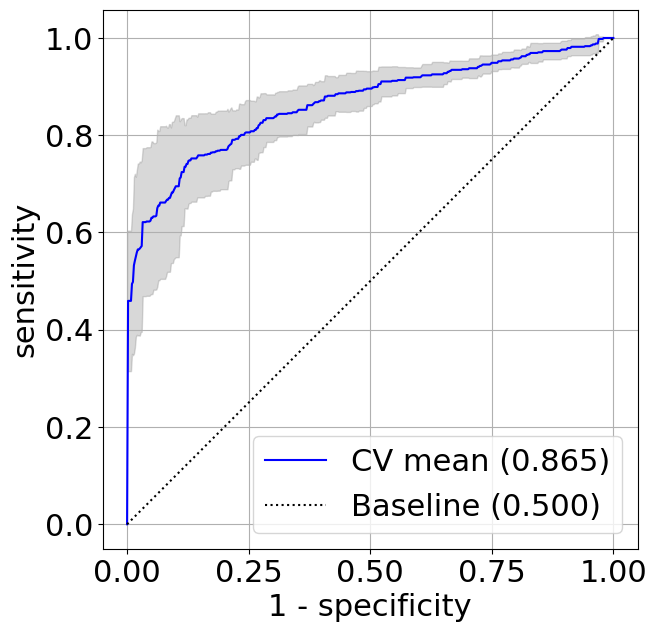

In [21]:
print("Clip level performance")
make_plot(pat_test)
plt.savefig('roc_clip.png', dpi=500)

Patient-level performance


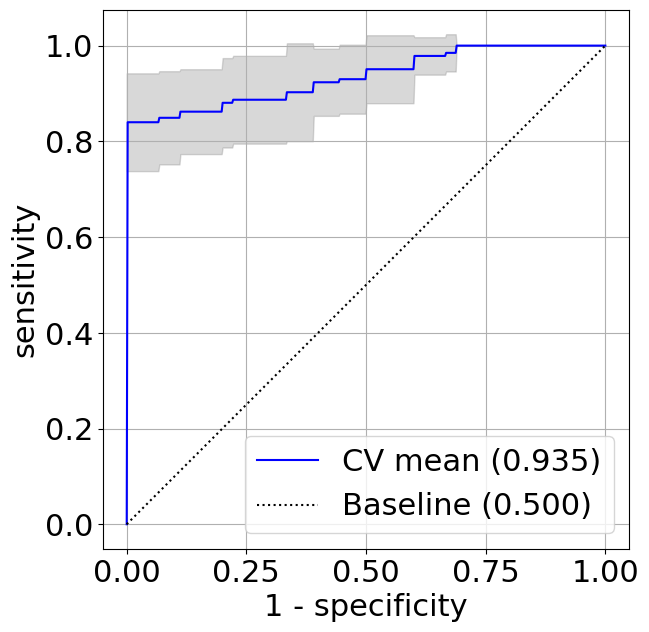

In [22]:
print("Patient-level performance")
make_plot(pat_lvl_preds_test)
plt.savefig('roc_study.png', dpi=500)


# Compute comparable metrics for external validation study
For external validation, we set the decision threshold so that the sensitivity is as close as possible to the CHOC validation sensitivity of 0.76

In [57]:
# find the threshold such that sensitivity ~= Choc value of 0.76 (validation set)
CHOC_sensitivity = 0.76

targets_test = np.concatenate(np.array(res_test.targets.apply(np.array)))
outputs_test = np.concatenate(np.array(res_test.outputs.apply(np.array)))

targets_test.shape, outputs_test.shape

((1145,), (1145,))

In [58]:
# create a roc curve
grid = np.linspace(0, 1, 100)
fpr, tpr, eps = roc_curve(targets_test.astype(int), outputs_test)
score = roc_auc_score(targets_test.astype(int), outputs_test)

# find the threshold such that sensitivity ~= Choc value of 0.76 (validation set)
idx = np.argmin(np.abs(tpr - CHOC_sensitivity))
decision_threshold = eps[idx]
print(f"Threshold: {decision_threshold:0.3f}")

Threshold: 0.069


In [59]:
def get_metrics(outputs, targets, decision_threshold):
    from sklearn.metrics import confusion_matrix
    y_pred = outputs >= decision_threshold
    y_true = targets.astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 

    sensitivity = tp / (tp + fn) # true positives / positives
    specificity = tn / (tn + fp) # true negatives / negatives
    ppv = tp / (tp + fp) # true positives / predicted positives
    npv = tn / (tn + fn) # true negatives / predicted negatives

    return sensitivity, specificity, ppv, npv

In [60]:
get_metrics(outputs_test, targets_test, decision_threshold)

(0.7594553706505295,
 0.7830578512396694,
 0.8270181219110379,
 0.7044609665427509)